In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "16"
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:
# Read in the questionnaire answers
answers_df = pd.read_csv("./Resources/mental_health_finaldata_1.csv")
answers_df.head()

,Age,Gender,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [33]:
# Use Label Encoding to convert the Age bands into Category Numbers
# First, store and print the categories so the process can be reversed later
age_categories = answers_df["Age"].astype('category')
# Print the Age categories, just to become familiar with the data
print(age_categories)
# Encode the Age column using the category codes
answers_df["Age"] = age_categories.cat.codes
print(answers_df["Age"])

0         20-25
1      30-Above
2      30-Above
3         25-30
4         16-20
         ...   
794    30-Above
795       25-30
796       20-25
797    30-Above
798    30-Above
Name: Age, Length: 799, dtype: category
Categories (4, object): ['16-20', '20-25', '25-30', '30-Above']
0      1
1      3
2      3
3      2
4      0
      ..
794    3
795    2
796    1
797    3
798    3
Name: Age, Length: 799, dtype: int8


In [34]:
# Use Label Encoding on the Gender, Occupation, and Days Indoors as well
gender_categories = answers_df["Gender"].astype('category')
answers_df["Gender"] = gender_categories.cat.codes
occupation_categories = answers_df["Occupation"].astype('category')
answers_df["Occupation"] = occupation_categories.cat.codes
days_categories = answers_df["Days Indoors"].astype('category')
answers_df["Days Indoors"] = days_categories.cat.codes
answers_df.head()

,Age,Gender,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,1,0,1,0,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,3,1,3,2,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,3,0,4,3,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,2,1,3,0,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,0,0,4,4,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [35]:
# Now, use One-Hot Encoding to convert the remaining columns into numerical data
# First, store the columns to be encoded in a variable
cols = ["Growing Stress", "Quarantine Frustrations", "Changes Habits", "Mental Health History", "Weight Change", "Mood Swings", "Coping Struggles", "Work Interest", "Social Weakness"]
# Use the get_dummies function to encode the columns
answers_df = pd.get_dummies(answers_df, columns=cols)
answers_df.head()

,Age,Gender,Occupation,Days Indoors,Growing Stress_Maybe,Growing Stress_No,Growing Stress_Yes,Quarantine Frustrations_Maybe,Quarantine Frustrations_No,Quarantine Frustrations_Yes,...,Mood Swings_Low,Mood Swings_Medium,Coping Struggles_No,Coping Struggles_Yes,Work Interest_Maybe,Work Interest_No,Work Interest_Yes,Social Weakness_Maybe,Social Weakness_No,Social Weakness_Yes
0,1,0,1,0,False,False,True,False,False,True,...,False,True,True,False,False,True,False,False,False,True
1,3,1,3,2,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,3,0,4,3,False,True,False,False,True,False,...,False,True,False,True,True,False,False,False,True,False
3,2,1,3,0,False,False,True,False,True,False,...,False,True,True,False,True,False,False,False,False,True
4,0,0,4,4,False,False,True,False,False,True,...,False,True,False,True,True,False,False,False,True,False


In [36]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(answers_df)
    inertia.append(k_model.inertia_)

In [37]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,9027.904881
1,2,7877.000746
2,3,7077.831996
3,4,6734.164882
4,5,6332.941556


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

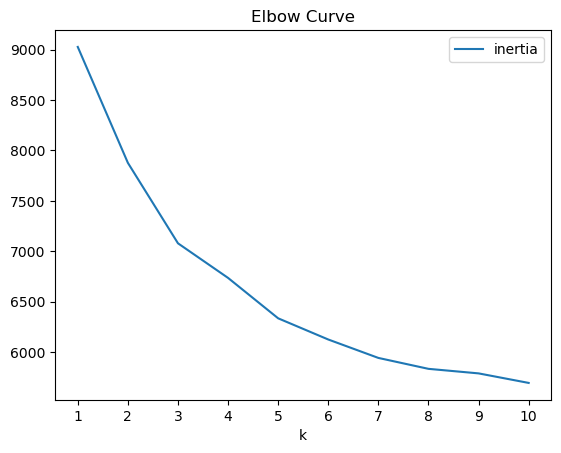

In [38]:
# Plot the elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [46]:
# All the other columns are 0s and 1s. We should try scaling the first four columns to see if it improves the model.

# create a labelling function
def label(col):
    answers_df[col] = answers_df[col].astype('category').cat.codes

# Start over by reloading the original df
# Read in the questionnaire answers
answers_df = pd.read_csv("./Resources/mental_health_finaldata_1.csv")

# Use Label Encoding
label("Age")
label("Gender")
label("Occupation")
label("Days Indoors")

# Store the columns to be scaled in a variable
cols_to_scale = ["Age", "Gender", "Occupation", "Days Indoors"]
cols_to_leave = ["Growing Stress", "Quarantine Frustrations", "Changes Habits", "Mental Health History", "Weight Change", "Mood Swings", "Coping Struggles", "Work Interest", "Social Weakness"]

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler
answers_scaled = scaler.fit_transform(answers_df[cols_to_scale])
# Convert the scaled data into a DataFrame
answers_scaled_df = pd.DataFrame(answers_scaled, columns=cols_to_scale)
# Join the scaled dataframe to the remaining columns from the original dataframe
answers_result_df = answers_scaled_df.join(answers_df[cols_to_leave])

# Keep the unscaled columns, we'll need them later
answers_df = pd.get_dummies(answers_df, cols_to_leave)

# One-Hot Encode the remaining columns
answers_result_df = pd.get_dummies(answers_result_df, columns=cols_to_leave)
answers_result_df.head()


,Age,Gender,Occupation,Days Indoors,Growing Stress_Maybe,Growing Stress_No,Growing Stress_Yes,Quarantine Frustrations_Maybe,Quarantine Frustrations_No,Quarantine Frustrations_Yes,...,Mood Swings_Low,Mood Swings_Medium,Coping Struggles_No,Coping Struggles_Yes,Work Interest_Maybe,Work Interest_No,Work Interest_Yes,Social Weakness_Maybe,Social Weakness_No,Social Weakness_Yes
0,-0.473606,-0.938083,-0.767779,-1.409837,False,False,True,False,False,True,...,False,True,True,False,False,True,False,False,False,True
1,1.282363,1.066004,0.667205,0.008878,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,1.282363,-0.938083,1.384697,0.718236,False,True,False,False,True,False,...,False,True,False,True,True,False,False,False,True,False
3,0.404379,1.066004,0.667205,-1.409837,False,False,True,False,True,False,...,False,True,True,False,True,False,False,False,False,True
4,-1.351591,-0.938083,1.384697,1.427593,False,False,True,False,False,True,...,False,True,False,True,True,False,False,False,True,False


In [47]:
# Now run K-means again, using the scaled data
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(answers_result_df)
    inertia.append(k_model.inertia_)

In [48]:
elbow_data_scaled = {"k": k, "inertia": inertia}
df_elbow_scaled = pd.DataFrame(elbow_data_scaled)

# Review the DataFrame
df_elbow_scaled.head()

,k,inertia
0,1,7848.510638
1,2,7232.093698
2,3,6839.358307
3,4,6439.628385
4,5,6213.118981


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

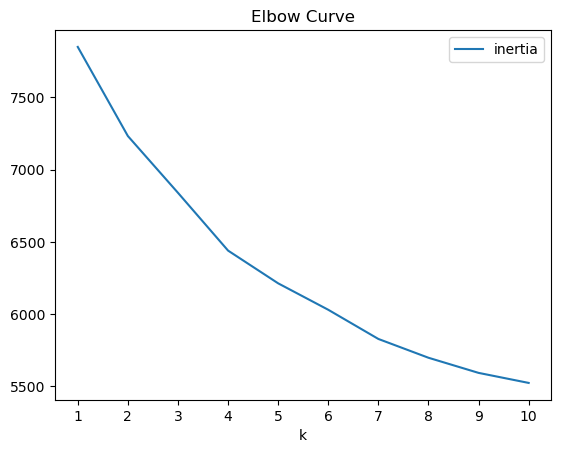

In [49]:
# Plot the elbow curve
df_elbow_scaled.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

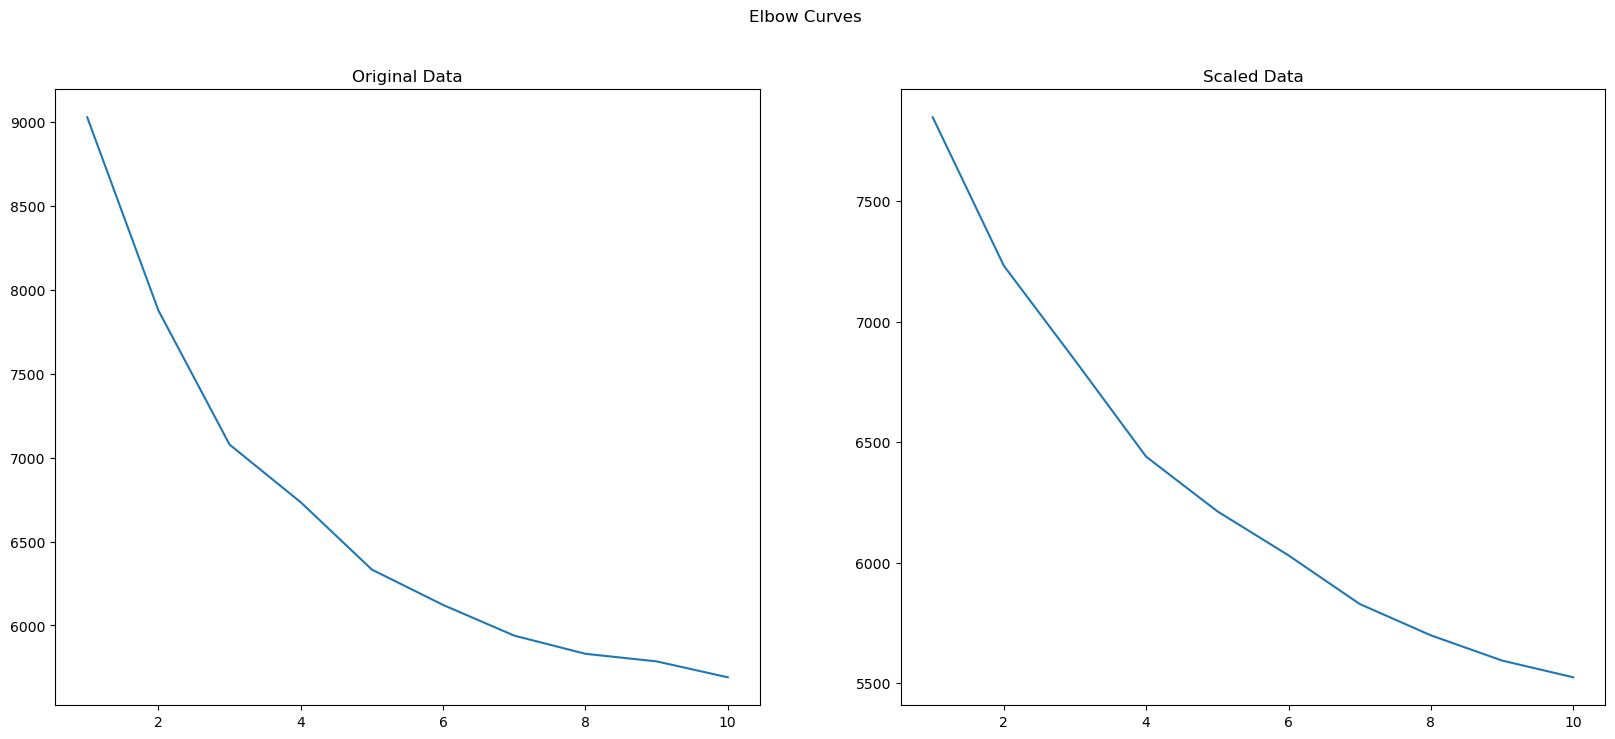

In [50]:
import matplotlib.pyplot as plt

fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Elbow Curves')
plt1.plot(df_elbow["k"], df_elbow["inertia"])
plt1.set_title("Original Data")
plt2.plot(df_elbow_scaled["k"], df_elbow_scaled["inertia"])
plt2.set_title("Scaled Data")
plt.show()

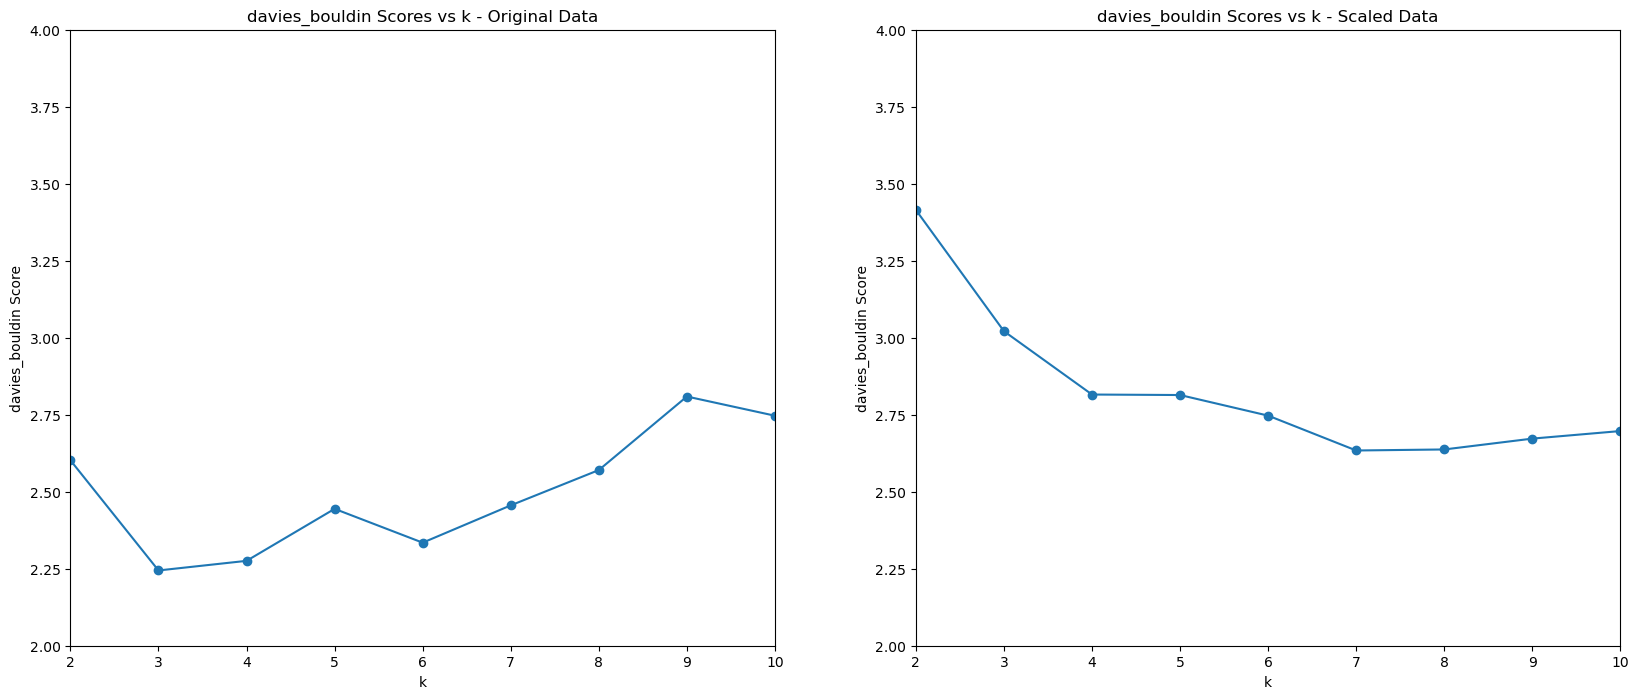

In [65]:
from sklearn import metrics

# Create a function to calculate the davies_bouldin score for each value of k
def get_davies_bouldin_score(k, data):
    # Create a KMeans instance with k clusters
    k_model = KMeans(n_clusters=k, n_init='auto', random_state=2)
    # Fit the model using the passed-in data
    k_model.fit(data)
    # Calculate the davies_bouldin score for the given k
    score = metrics.davies_bouldin_score(data, k_model.labels_)
    return score

# Create a list to store the davies_bouldin scores for each value of k
davies_bouldin_scores_1 = []
davies_bouldin_scores_2 = []

# Create a for-loop to compute the davies_bouldin scores for values of k between 2 and 11
# Append the results to the davies_bouldin_scores list
for i in range(2, 11):
    davies_bouldin_scores_1.append(get_davies_bouldin_score(i, answers_df))
    davies_bouldin_scores_2.append(get_davies_bouldin_score(i, answers_result_df))
    

# Plot the davies_bouldin_scores against k
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(20, 8))

plt1.plot(range(2, 11), davies_bouldin_scores_1, marker="o")
plt1.set_xlim(2,10)
plt1.set_ylim(2,4)
plt1.set_title("davies_bouldin Scores vs k - Original Data")
plt1.set_xlabel("k")
plt1.set_ylabel("davies_bouldin Score")
plt2.plot(range(2, 11), davies_bouldin_scores_2, marker="o")
plt2.set_xlim(2,10)
plt2.set_ylim(2,4)
plt2.set_title("davies_bouldin Scores vs k - Scaled Data")
plt2.set_xlabel("k")
plt2.set_ylabel("davies_bouldin Score")
plt.show()


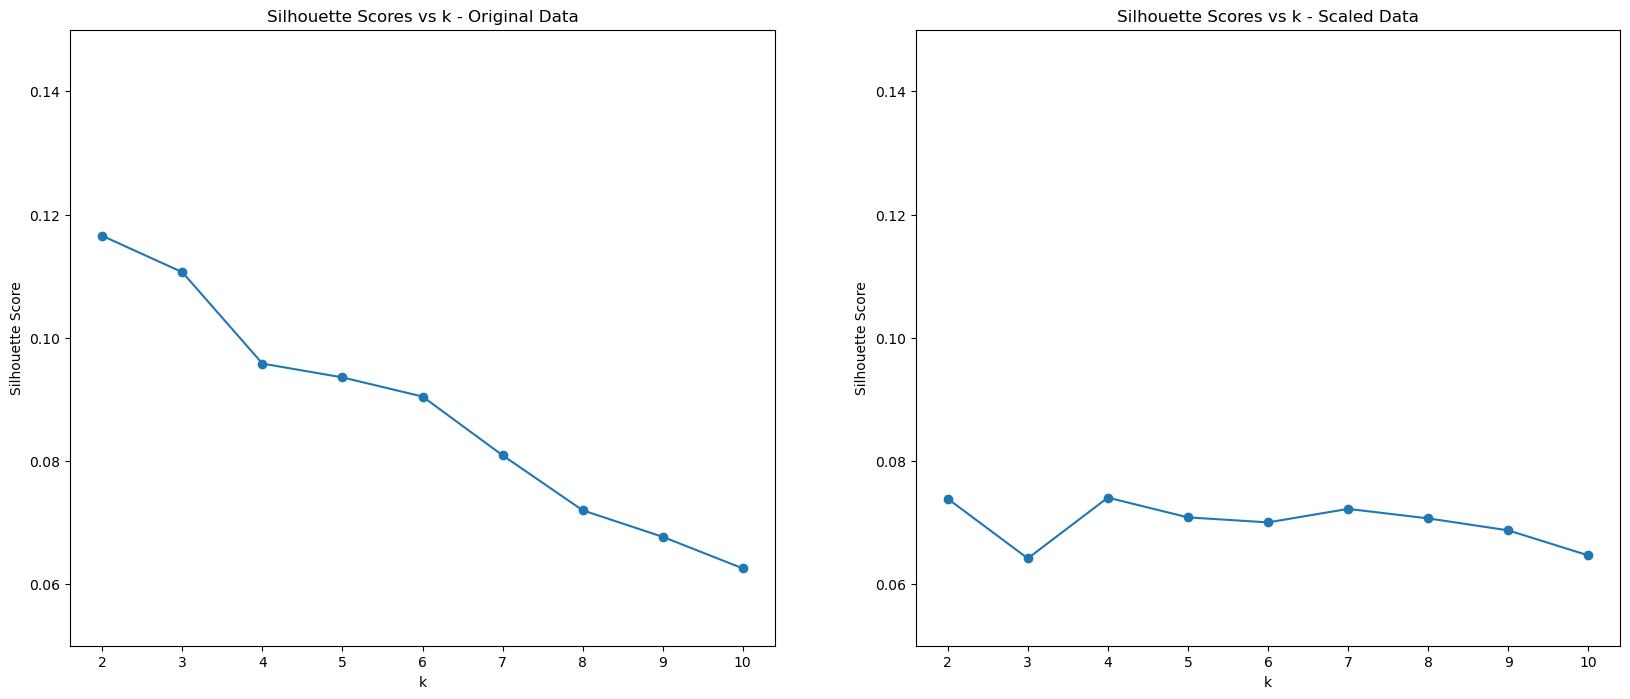

In [66]:
# Create a function to calculate the silhouette score for each value of k
def get_silhouette_score(k, data):
    # Create a KMeans instance with k clusters
    k_model = KMeans(n_clusters=k, n_init='auto', random_state=2)
    # Fit the model using the passed-in data
    k_model.fit(data)
    # Calculate the silhouette score for the given k
    score = metrics.silhouette_score(data, k_model.labels_)
    return score

# Create a list to store the silhouette scores for each value of k
silhouette_scores_1 = []
silhouette_scores_2 = []

# Create a for-loop to compute the silhouette scores for values of k between 2 and 11
# Append the results to the silhouette_scores list
for i in range(2, 11):
    silhouette_scores_1.append(get_silhouette_score(i, answers_df))
    silhouette_scores_2.append(get_silhouette_score(i, answers_result_df))
    

# Plot the silhouette_scores against k
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(20, 8))

plt1.plot(range(2, 11), silhouette_scores_1, marker="o")
plt1.set_ylim(0.05, .15)
plt1.set_title("Silhouette Scores vs k - Original Data")
plt1.set_xlabel("k")
plt1.set_ylabel("Silhouette Score")
plt2.plot(range(2, 11), silhouette_scores_2, marker="o")
plt2.set_ylim(0.05, .15)
plt2.set_title("Silhouette Scores vs k - Scaled Data")
plt2.set_xlabel("k")
plt2.set_ylabel("Silhouette Score")
plt.show()
